# Library Defintion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Data import

In [2]:
path = 'C:/Users/ismai/Documents/DataScience/learnbay/ML Models/LogisticRegression/Dataset_spine.csv'
df= pd.read_csv(path)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [4]:
print("DataFrame Shape: ", df.shape)
print(f"DataFrame  Size: {df.size}")

DataFrame Shape:  (310, 14)
DataFrame  Size: 4340


### Basic DataFrame Cleaning

In [5]:
df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status','dummy']
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status,dummy
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [6]:
del df['dummy']

In [7]:
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


# Exploratory Data Analysis

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


### EDA - on Dependent Variable

<AxesSubplot:xlabel='Status', ylabel='count'>

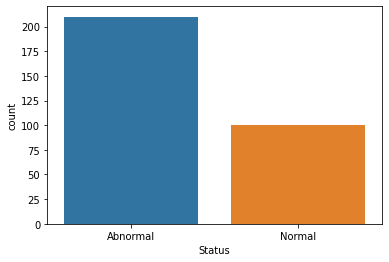

In [9]:
#Target Variable Check
sns.countplot(x = 'Status', data = df)

In [10]:
a = pd.DataFrame(df.Status.value_counts()).reset_index()
a.rename(columns={'Status' : 'Freq'}, inplace=True)
a

,index,Freq
0,Abnormal,210
1,Normal,100


In [11]:
b = pd.DataFrame(df.Status.value_counts()/df.Status.count() * 100).reset_index()
b.rename(columns={'Status' : 'Freq %'}, inplace=True)
b

,index,Freq %
0,Abnormal,67.741935
1,Normal,32.258065


In [12]:
Target_dist = pd.merge(a,b, on = 'index').rename(columns={'index':'Status'}).set_index('Status')
Target_dist

,Freq,Freq %
Status,,
Abnormal,210,67.741935
Normal,100,32.258065


In [13]:
df.groupby('Status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


In [14]:
df.groupby('Status').median()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


### EDA - On Independent Variable

2
****************************************
1
****************************************


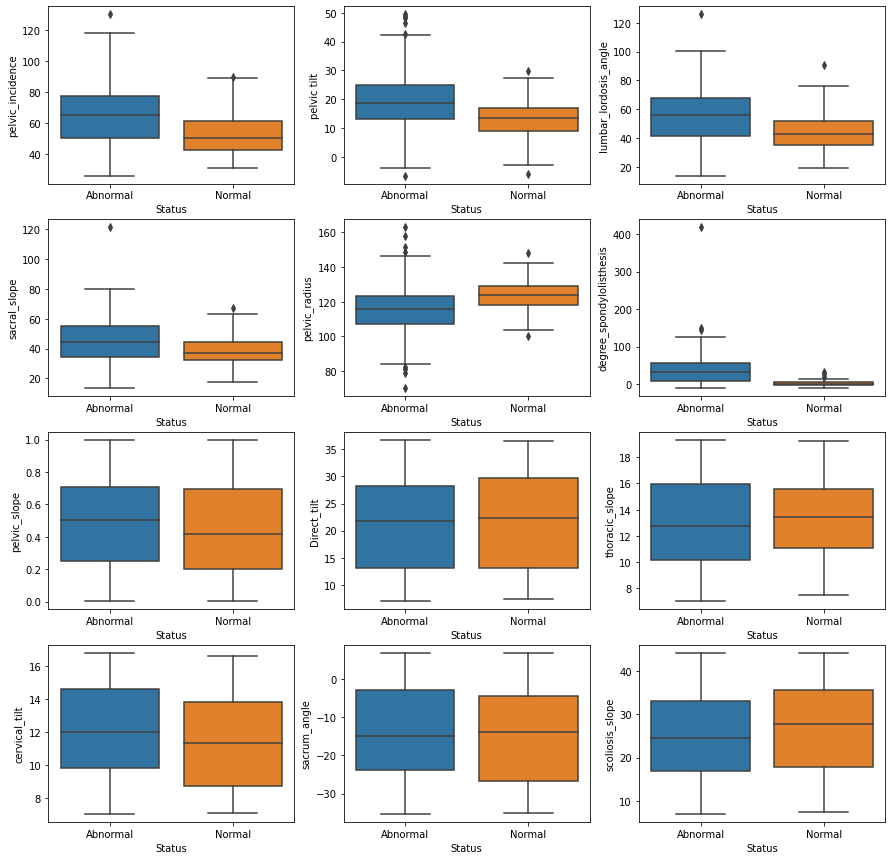

In [15]:
fig , axes = plt.subplots(4,3, figsize=(15,15))
print(axes.ndim)
axes = axes.flatten() #Convertign 1D array
print("****************************************")  
print(axes.ndim)
print("****************************************") 

for i in range(len(df.columns)-1):
    sns.boxplot(x='Status', y = df.iloc[:,i], data=df, ax = axes[i])
plt.show()


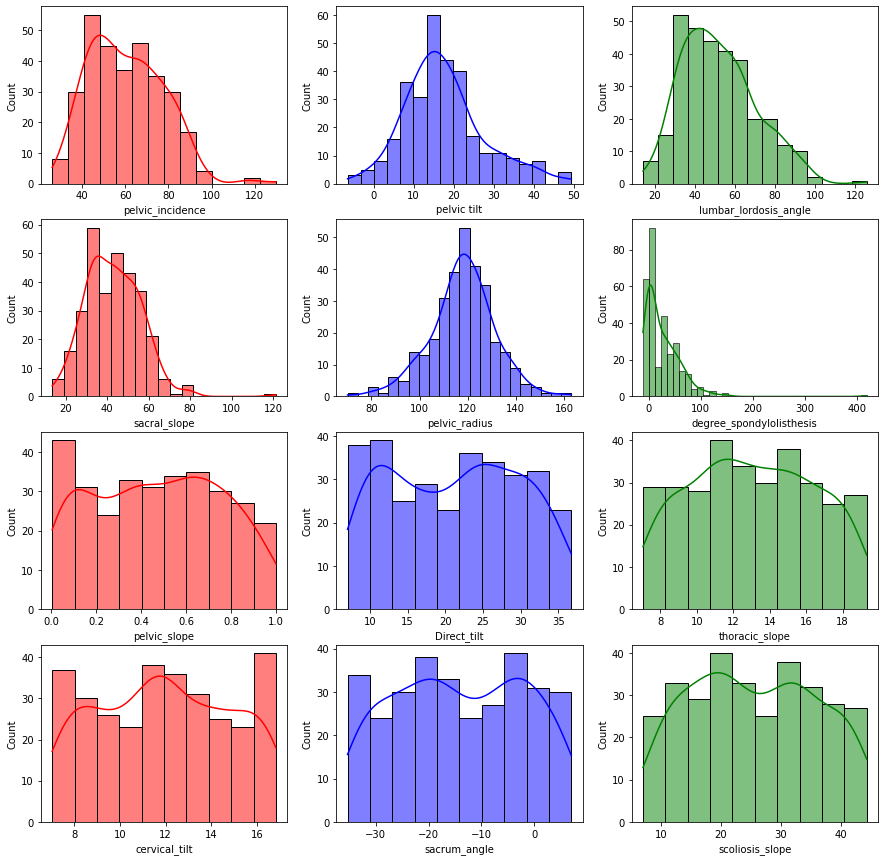

In [16]:
fig , axes = plt.subplots(4,3, figsize=(15,15))
axes = axes.flatten()
c = list('rbg') * 4
for i in range(len(df.columns)-1):
    sns.histplot(df.iloc[:,i], ax = axes[i], color=c[i],kde=True)
plt.show()

### Correlation and Variance Inflation Factor (VIF)

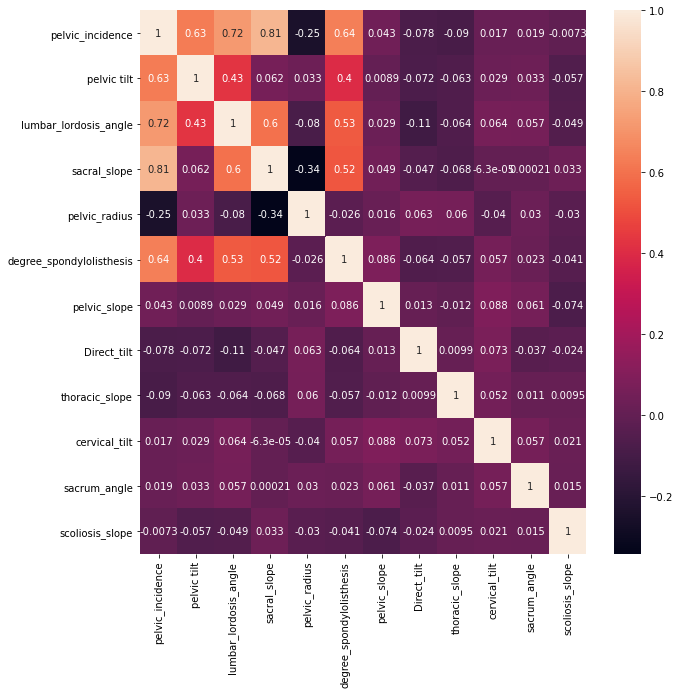

In [17]:
plt.figure(figsize= (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
#Selecting only X features
X = df.iloc[:,:len(df.columns)-1]
X.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171


In [20]:
def calc_vif(X):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X.columns
    vif_df["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_df.set_index('Features') 

In [21]:
calc_vif(X)

C:\Users\ismai\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor
Features,
pelvic_incidence,inf
pelvic tilt,inf
lumbar_lordosis_angle,19.443921
sacral_slope,inf
pelvic_radius,34.370439
degree_spondylolisthesis,2.436405
pelvic_slope,3.811737
Direct_tilt,7.225984
thoracic_slope,15.107876


# Model Build

In [22]:
df.loc[df.Status=='Abnormal','Status'] = 1

In [23]:
df.loc[df.Status=='Normal','Status'] = 0

In [24]:
df.Status.value_counts()

1    210
0    100
Name: Status, dtype: int64

In [25]:
#Selecting X and y features
X = df.loc[:,df.columns != 'Status']
y = df.loc[:, df.columns=='Status']

In [26]:
#Data Pre=Processing --> Training/Testing Split-30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=786)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(217, 12) (217, 1)
(93, 12) (93, 1)


In [27]:
#Data Pre=Processing --> Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)

StandardScaler()

In [28]:
#Transforming trained and test data - Only independent Features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
y_train.info() #Coverting to numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 51 to 286
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Status  217 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


In [30]:
#Converting object to int
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [31]:
#Flatteing the dataframe 
y_train  = pd.Series.ravel(y_train)
y_test = pd.Series.ravel(y_test)

In [32]:
#Building Model using sklearn library
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
print("Score of Training DF: ", reg.score(X_train_scaled, y_train))
print("Score of Testing DF: ", reg.score(X_test_scaled, y_test))

Score of Training DF:  0.8709677419354839
Score of Testing DF:  0.8602150537634409


In [34]:
import statsmodels.api as sm

In [35]:
reg_stats = sm.Logit(y_train, X_train_scaled)
reg_stat_result = reg_stats.fit()


         Current function value: 0.452896
         Iterations: 35


C:\Users\ismai\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
print(X.columns)
print("*=====================================================================*")
print("*=====================================================================*")
print(reg_stat_result.summary2())

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope'],
      dtype='object')
*=====================================================================*
*=====================================================================*
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.291     
Dependent Variable:  y                 AIC:               220.5569  
Date:                2021-11-05 09:16  BIC:               261.1157  
No. Observations:    217               Log-Likelihood:    -98.278   
Df Model:            11                LL-Null:           -138.58   
Df Residuals:        205               LLR p-value:       1.1270e-12
Converged:           0.0000            Scale:             1.0000    
No. Iterations:      35.0000                              

Understanding the model result summary

The above model did not converge because some variables were highly correlated with each other and this would have led to the correlation/ covariance matrix to be singular.

In fact, it was very intersting to note that in our data, the Pelvic Incidence column values are an exact sum of Pelvic Tilt and Sacral Slope. So that explains.

Also in our statistical test results, the Standard error values are very high and p-value is very high for few variables. Hence we will remove few variable such as ['lumbar_lordosis_angle', 'pelvic_incidence'] and re run the model.

In [47]:
cols_to_include = [cols for cols in X.columns if cols not in ['lumbar_lordosis_angle', 'pelvic_incidence']] #'pelvic tilt','sacral_slope'
X = df[cols_to_include]

In [38]:
X.columns

Index(['pelvic tilt', 'sacral_slope', 'pelvic_radius',
       'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt',
       'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope'],
      dtype='object')

In [39]:
#Preprocessing steps
#Data Pre=Processing --> Scaling 
def pre_procerss(X_feature):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    #print(X_train.shape, X_test.shape)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    scaler.fit(X_train)
    
       # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    #print(train_scaled.shape)
    #print(test_scaled.shape)
    return(train_scaled, test_scaled, y_train, y_test)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X_train)
    
       # Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train=y_train.astype('int')
y_test=y_test.astype('int')


In [53]:
X_train.shape

(217, 10)

In [54]:
print("Training and Testing data size--> X feature : ", X_train_scaled.shape, X_test_scaled.shape)
print("Training and Testing data size--> Y feature : ",y_train.shape, y_test.shape)

Training and Testing data size--> X feature :  (217, 10) (93, 10)
Training and Testing data size--> Y feature :  (217,) (93,)


In [55]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x, y)
    return(logreg)

logreg_result = logistic_regression(X_train_scaled, y_train)

In [56]:
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.853
Test set score: 0.817


In [57]:
#Check model , can predict
logreg_result.predict([[1,1,1,1,1,1,1,1,1,1]])

array([1])

In [58]:
#Logit stats model
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.474893
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.245     
Dependent Variable: y                AIC:              226.1035  
Date:               2021-11-05 09:18 BIC:              259.9024  
No. Observations:   217              Log-Likelihood:   -103.05   
Df Model:           9                LL-Null:          -136.45   
Df Residuals:       207              LLR p-value:      6.4477e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1         0.0821     0.2120    0.3873   0.6985   -0.3334    0.4976
x2        -0.6301     0.2466   -2.5558   0.0106   -1.1134 

### Saving ML model as pickle

In [ ]:
#Saving sklearn model to pickel 
import joblib
joblib.dump(logreg_result,'lr_model.pkl')

In [ ]:
model1 = joblib.load('lr_model.pkl')

In [ ]:
model1.predict([[1,1,1,1,1,1,1,1,1,1]])

In [ ]:
model1.predict_proba([[1,1,1,1,1,1,1,1,1,1]])  #0 Class and 1 Class

### Saving Scale object 

In [ ]:
#Saving scaling object
joblib.dump(scaler,'scaler.pkl')

In [ ]:
model2 = joblib.load('scaler.pkl')

In [ ]:
arr = model2.transform([[1,1,1,1,1,1,1,1,1,1]])
arr

# Model Evaluation

In [60]:
#Final variables for evaluation
print("Training and Testing data size--> X feature : ", X_train_scaled.shape, X_test_scaled.shape)
print("Training and Testing data size--> Y feature : ",y_train.shape, y_test.shape)

Training and Testing data size--> X feature :  (217, 10) (93, 10)
Training and Testing data size--> Y feature :  (217,) (93,)


In [133]:
# assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)
y_pred #Prediction based on test data

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0])

In [126]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,recall_score, precision_score
                                

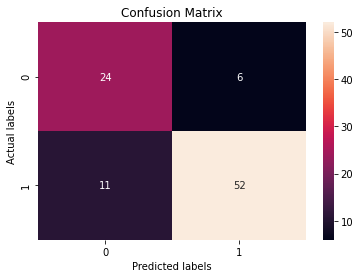

In [96]:
#Confusion metrics
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)  
sns.heatmap(cm, annot=True)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix');


In [97]:
#Classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        30
           1       0.90      0.83      0.86        63

    accuracy                           0.82        93
   macro avg       0.79      0.81      0.80        93
weighted avg       0.83      0.82      0.82        93



In [99]:
#Area under Curve, tpr (Recall, Sensitivity), fpr, threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred)
print(fpr,tpr, threshold)
auc = roc_auc_score(y_test, y_pred)
print(auc)

[0.  0.2 1. ] [0.         0.82539683 1.        ] [2 1 0]
0.8126984126984128


In [106]:
#Random_Model
fpr1 = [0.  ,1. ]
tpr1 = [0. ,1. ]

<function matplotlib.pyplot.show(close=None, block=None)>

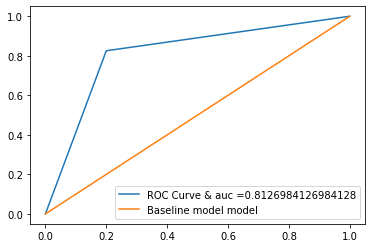

In [112]:
plt.plot(fpr,tpr, label="ROC Curve & auc =" +str(auc))
plt.plot((0,1),(0,1), label="Baseline model model")
plt.legend()
plt.show

In [129]:
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)}")
print(f"Recall Score   : {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")


Accuracy Score : 0.8172043010752689
Recall Score   : 0.8253968253968254
Precision Score: 0.896551724137931
